In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

## Load Data

In [6]:
# Load labor capacity data
ds_mean = xr.open_dataset('../data/processed/CESM2/labor_mean_ens1-5.nc').rename({'__xarray_dataarray_variable__':'capacity'}).isel(time=slice(0,-1))

In [3]:
# Population data
ds_pop = xr.open_dataset('../data/processed/CESM2/population_regrid_cesm2.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

## Spatial Map

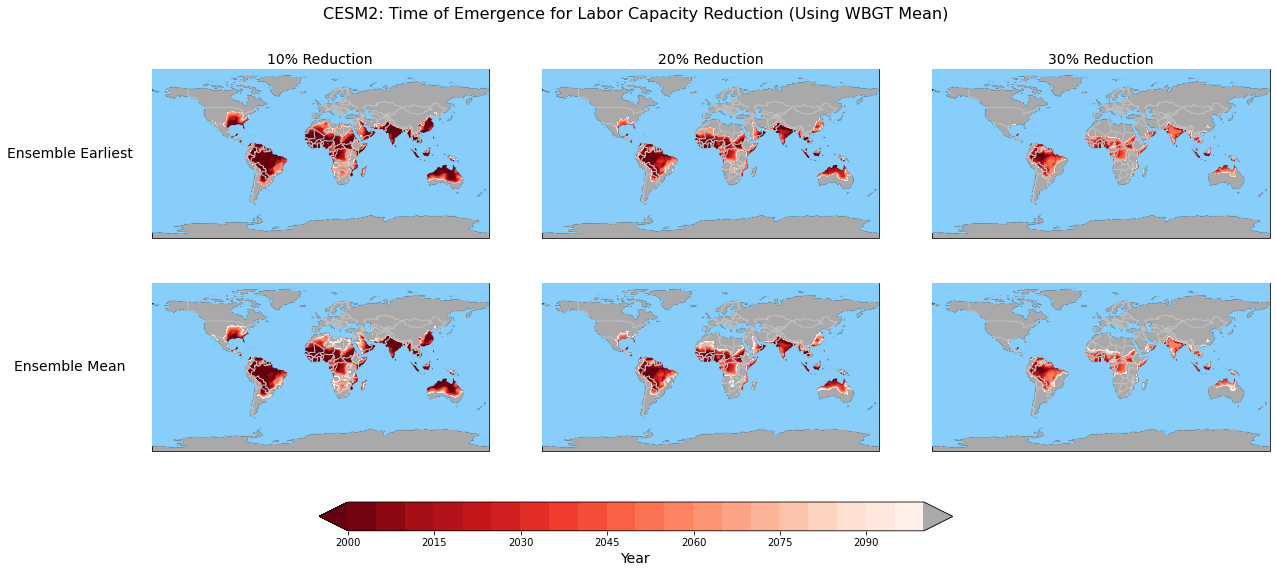

In [16]:
lf.spatial_toe(ds_mean['capacity'],'CESM2: Time of Emergence for Labor Capacity Reduction (Using WBGT Mean)')
plt.savefig('cesm_toe_mean_map.png')

## Spatial Map (Diff)

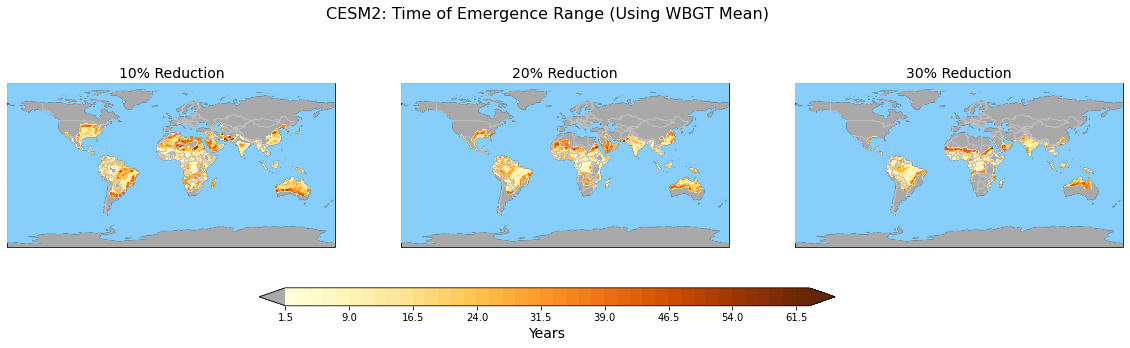

In [25]:
lf.spatial_toe_diff(ds_mean['capacity'],'CESM2: Time of Emergence Range (Using WBGT Mean)')
plt.savefig('cesm2_toe_range_mean.png')

## Bar Chart: Average ToE

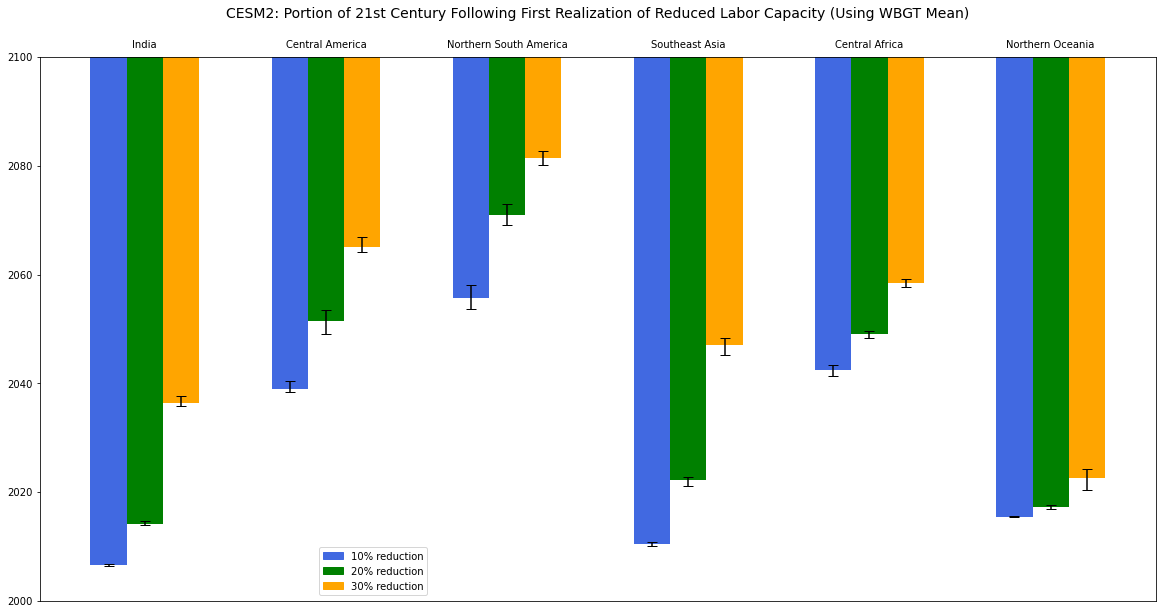

In [19]:
lf.average_toe_bar(ds_mean['capacity'],ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n')

## Bar Chart: ToE of Average

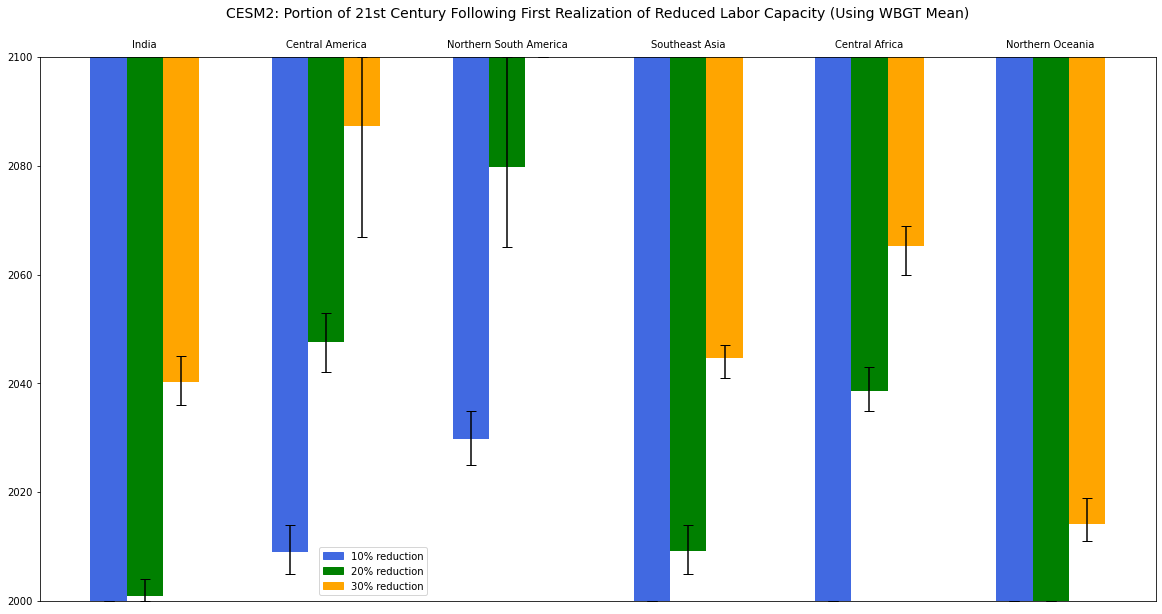

In [21]:
lf.toe_bar(ds_mean,ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n')